<a href="https://colab.research.google.com/github/KIMssy/Basic-statistics-programming/blob/main/moving_average_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
data = pd.read_csv('/content/covid_1.csv',sep=',')

In [116]:
print(data)

     구분별 상태별          data  people
0     전체  신규  2020. 04. 09    39.0
1     전체  신규  2020. 04. 10    27.0
2     전체  신규  2020. 04. 11    30.0
3     전체  신규  2020. 04. 12    32.0
4     전체  신규  2020. 04. 13    25.0
...   ..  ..           ...     ...
9149  검역  신규  2021. 02. 05     7.0
9150  검역  신규  2021. 02. 06    11.0
9151  검역  신규  2021. 02. 07    27.0
9152  검역  신규  2021. 02. 08     9.0
9153  검역  신규  2021. 02. 09    11.0

[9154 rows x 4 columns]


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9154 entries, 0 to 9153
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   구분별     9154 non-null   object 
 1   상태별     9154 non-null   object 
 2   data    9154 non-null   object 
 3   people  9099 non-null   float64
dtypes: float64(1), object(3)
memory usage: 286.2+ KB


In [118]:
def get_people(i):
    z = data['people'][i]  
    return z

In [119]:
def mov_avg_filter(x_n, x_meas):
    """Calculate average sonar using a moving average filter (batch expression)."""
    n = len(x_n)
    for i in range(n-1): #인덱스는 0에서부터 시작하기 때문에 n-1을 해야함
      x_n[i] = x_n[i+1]
      x_n[n-1] = x_meas
      x_avg = np.mean(x_n)

    return x_avg, x_n

    #이동평균필터

In [120]:
len(data)

9154

In [121]:
#input paramoters

n_samples = 9154 #n_sample은 그대로, 데이터 갯수여서

n=10
time_end = 10

In [122]:
dt = time_end / n_samples
time = np.arange(0, time_end, dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [123]:
print(time)
print(x_meas_save)
print(x_avg_save)

[0.00000000e+00 1.09241861e-03 2.18483723e-03 ... 9.99672274e+00
 9.99781516e+00 9.99890758e+00]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [124]:
for i in range(n_samples):
  x_meas = get_people(i)
  if i == 0:
      x_avg, x_n = x_meas, x_meas * np.ones(n)  #x_meas * np.ones(n):배열이다 / 값이 얼마인지 보기 /x_meas * np.ones(n):의미파악 중요
      print(x_meas * np.ones(n))
  else:
    x_avg, x_n = mov_avg_filter(x_n, x_meas)
    print(x_n)
  x_meas_save[i] = x_meas
  x_avg_save[i] = x_avg

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[0. 2. 0. 2. 1. 3. 2. 0. 4. 4.]
[2. 0. 2. 1. 3. 2. 0. 4. 0. 0.]
[0. 2. 1. 3. 2. 0. 4. 0. 0. 0.]
[2. 1. 3. 2. 0. 4. 0. 0. 0. 0.]
[1. 3. 2. 0. 4. 0. 0. 0. 5. 5.]
[3. 2. 0. 4. 0. 0. 0. 5. 5. 5.]
[2. 0. 4. 0. 0. 0. 5. 5. 2. 2.]
[0. 4. 0. 0. 0. 5. 5. 2. 7. 7.]
[4. 0. 0. 0. 5. 5. 2. 7. 1. 1.]
[0. 0. 0. 5. 5. 2. 7. 1. 5. 5.]
[0. 0. 5. 5. 2. 7. 1. 5. 6. 6.]
[ 0.  5.  5.  2.  7.  1.  5.  6. 18. 18.]
[ 5.  5.  2.  7.  1.  5.  6. 18. 22. 22.]
[ 5.  2.  7.  1.  5.  6. 18. 22. 24. 24.]
[ 2.  7.  1.  5.  6. 18. 22. 24. 28. 28.]
[ 7.  1.  5.  6. 18. 22. 24. 28. 22. 22.]
[ 1.  5.  6. 18. 22. 24. 28. 22. 52. 52.]
[ 5.  6. 18. 22. 24. 28. 22. 52. 31. 31.]
[ 6. 18. 22. 24. 28. 22. 52. 31. 32. 32.]
[18. 22. 24. 28. 22. 52. 31. 32. 15. 15.]
[22. 24. 28. 22. 52. 31. 32. 15. 31. 31.]
[24. 28. 22. 52. 31. 32. 15. 31. 29. 29.]
[28. 22. 52. 31. 32. 15. 31. 29. 34. 34.]
[22. 52. 31. 32. 15. 31. 29. 34. 35. 35.]
[52. 31. 32. 15. 31. 29. 34. 35. 27. 27.]
[31. 32. 15. 31. 29. 34.

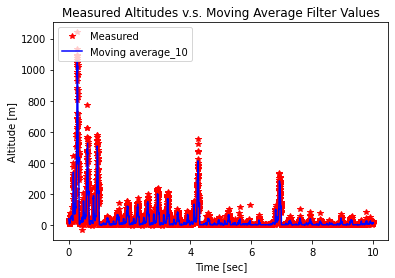

In [125]:
plt.plot(time, x_meas_save, 'r*', label='Measured')
plt.plot(time, x_avg_save, 'b-', label='Moving average_10')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')
plt.savefig('/content/png')